In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [26]:
# DataSet: https://www.kaggle.com/datasets/shivam2503/diamonds
data = pd.read_csv("D:\DataSets\Predictive Analysis_ML\diamonds dataset.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [27]:
data.shape

(53940, 11)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [29]:
data.drop(columns=["Unnamed: 0"], inplace=True, axis=1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [30]:
data["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [31]:
data["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [32]:
data["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [33]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [34]:
# x, y, z cant be zero
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

In [35]:
data.shape

(53920, 10)

In [36]:
data.isnull().mean()*100

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [37]:
data = pd.get_dummies(data, ["cut","color","clarity"], drop_first=True)
data.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [38]:
s = data.dtypes == "object"
objects = list(s[s].index)
print(objects)

lab = LabelEncoder()

for cols in objects:
    data[cols] = lab.fit_transform(data[cols])
    
data.head()

[]


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [39]:
#import plotly.express as px
#fig = px.scatter_3d(data, x="carat", y="cut", z="price")
#fig.show()

In [40]:
#sns.pairplot(data, hue="cut")

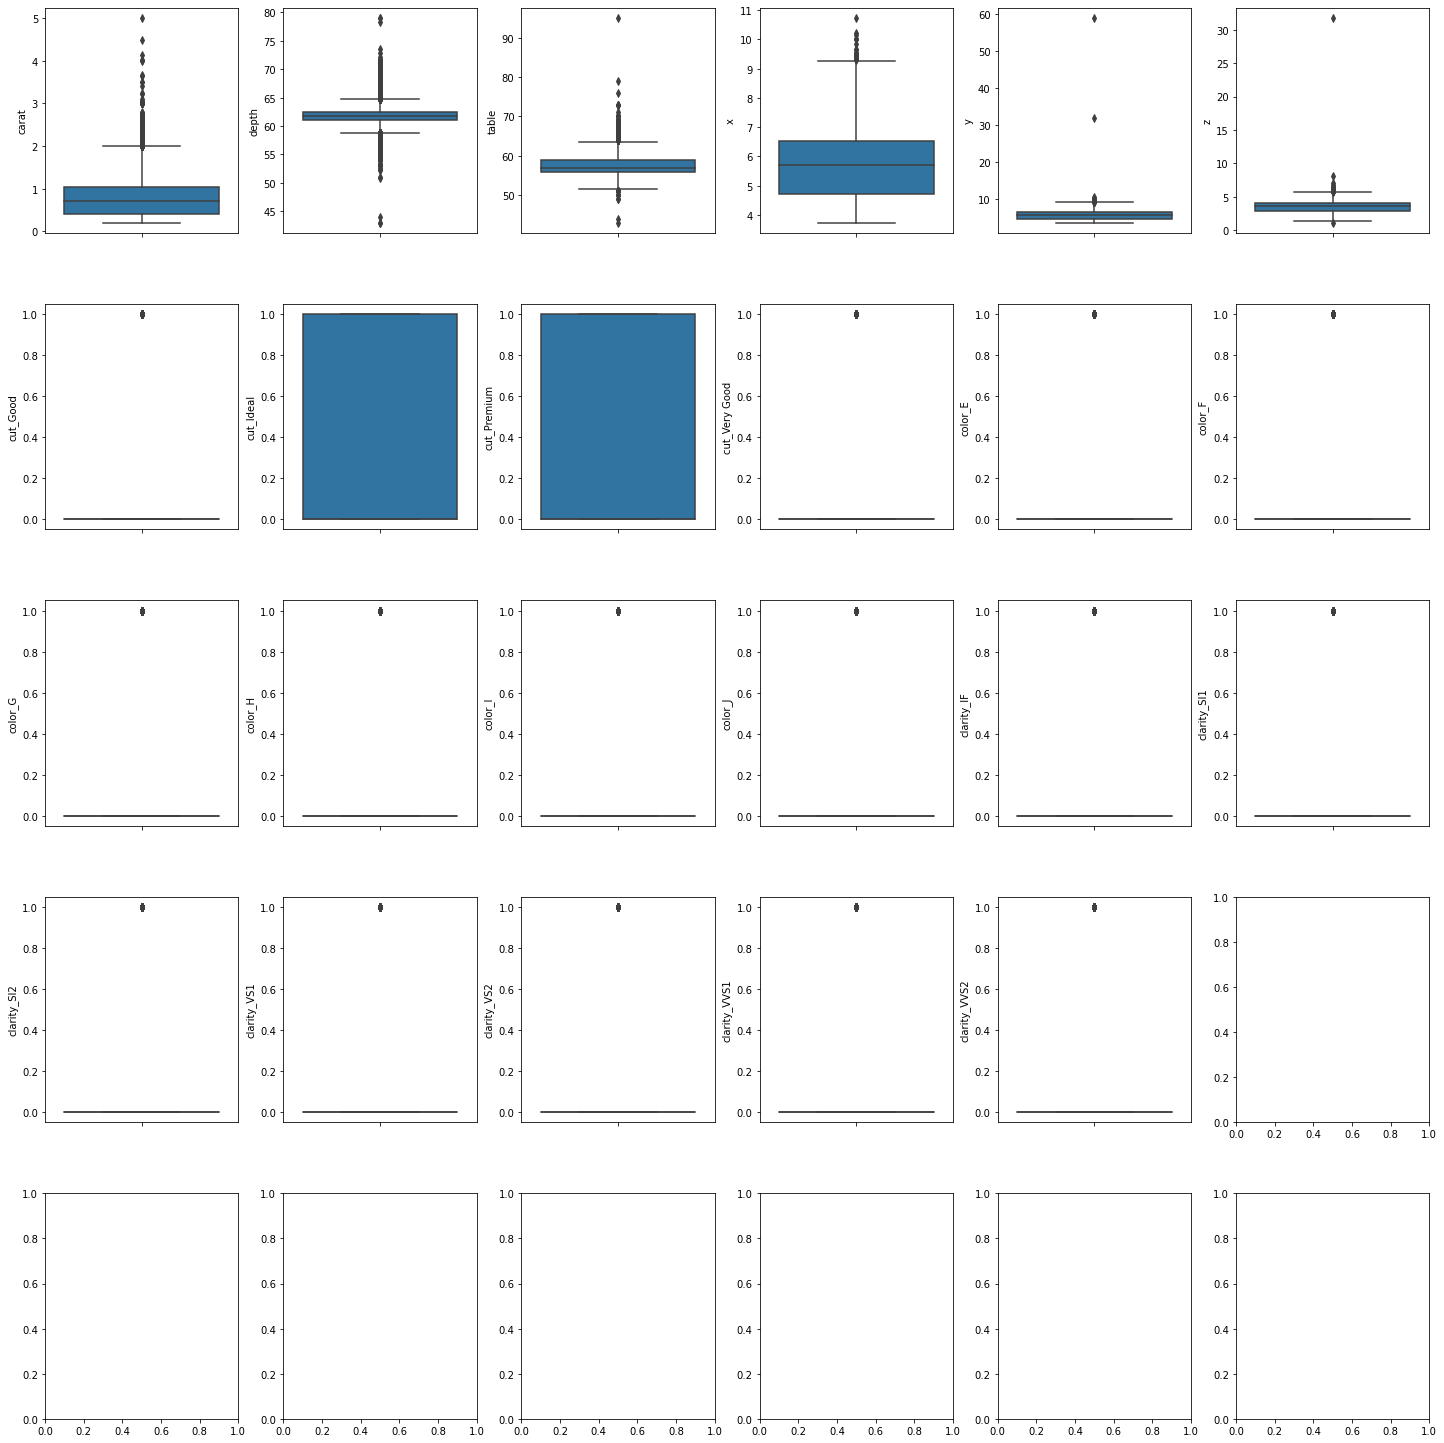

In [41]:
data1 = data.drop(columns=['price'], axis=1)

fig, ax = plt.subplots(ncols=6, nrows=5, figsize=(20, 20))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [42]:
data["carat"] = data[(data["carat"] < data["carat"].mean() + 3 * data["carat"].std()) & (data["carat"] > data["carat"].mean() - 3 * data["carat"].std())] 
data["depth"] = data[(data["depth"] < data["depth"].mean() + 3 * data["depth"].std()) & (data["depth"] > data["depth"].mean() - 3 * data["depth"].std())] 
data["table"] = data[(data["table"] < data["table"].mean() + 3 * data["table"].std()) & (data["table"] > data["table"].mean() - 3 * data["table"].std())] 
#data["price"] = data[(data["price"] < data["price"].mean() + 3 * data["price"].std()) & (data["price"] > data["price"].mean() - 3 * data["price"].std())] 
data["x"] = data[(data["x"] < data["x"].mean() + 3 * data["x"].std()) & (data["x"] > data["x"].mean() - 3 * data["x"].std())] 
data["y"] = data[(data["y"] < data["y"].mean() + 3 * data["y"].std()) & (data["y"] > data["y"].mean() - 3 * data["y"].std())] 
data["z"] = data[(data["z"] < data["z"].mean() + 3 * data["z"].std()) & (data["z"] > data["z"].mean() - 3 * data["z"].std())] 


In [43]:
#data = data[data["x"]<30]
#data = data[data["y"]<30]
#data = data[(data["z"]<30) & (data["z"]>2)]
#data.shape

In [44]:
data.shape

(53920, 24)

In [45]:
data.isnull().mean()*100

carat            0.808605
depth            2.038205
table            1.420623
price            0.000000
x                0.808605
y                0.812315
z                0.817878
cut_Good         0.000000
cut_Ideal        0.000000
cut_Premium      0.000000
cut_Very Good    0.000000
color_E          0.000000
color_F          0.000000
color_G          0.000000
color_H          0.000000
color_I          0.000000
color_J          0.000000
clarity_IF       0.000000
clarity_SI1      0.000000
clarity_SI2      0.000000
clarity_VS1      0.000000
clarity_VS2      0.000000
clarity_VVS1     0.000000
clarity_VVS2     0.000000
dtype: float64

In [46]:
data = data.dropna()
data.shape

(52552, 24)

In [47]:
data.describe()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000,...,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000,52552.000000
mean,0.780895,0.780895,0.780895,3836.404000,0.780895,0.780895,0.780895,0.087551,0.407787,0.258829,...,0.152896,0.098436,0.049741,0.033909,0.243207,0.165626,0.152592,0.229297,0.069017,0.095582
std,0.449400,0.449400,0.449400,3869.153555,0.449400,0.449400,0.449400,0.282644,0.491428,0.437996,...,0.359891,0.297906,0.217412,0.180997,0.429023,0.371748,0.359597,0.420384,0.253486,0.294019
min,0.200000,0.200000,0.200000,326.000000,0.200000,0.200000,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.400000,0.400000,940.000000,0.400000,0.400000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,0.700000,0.700000,2363.000000,0.700000,0.700000,0.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,1.040000,1.040000,5242.000000,1.040000,1.040000,1.040000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.210000,2.210000,2.210000,18818.000000,2.210000,2.210000,2.210000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
x = data.drop(columns="price")
y = data["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

In [49]:
lr = LinearRegression()

In [50]:
dtr = DecisionTreeRegressor(max_depth=20)

In [51]:
br = BaggingRegressor()

In [52]:
rfr = RandomForestRegressor(criterion="squared_error")

In [53]:
estimator = [("lr",lr), ("dtr",dtr), ("rfr",rfr)]

vr = VotingRegressor(estimators=estimator)

In [54]:
models = [("lr",lr), ("dtr",dtr), ("vr",vr), ("br",br), ("rfr",rfr)]

for i in models:
    var = i[1]
    var.fit(x_train,y_train)
    pred = var.predict(x_test)
    #print("mae ",i[0],": ",mean_absolute_error(y_test,pred))
    print("r2_score ",i[0],": ",r2_score(y_test,pred)*100)

r2_score  lr :  91.41973819949023
r2_score  dtr :  97.35080721302164
r2_score  vr :  97.27059354642346
r2_score  br :  97.72638323436485
r2_score  rfr :  97.82364471994428
